In [29]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

## 242b

### Read data

In [30]:
from util.structs import DataCluster, Dataset, Measurement;
from util import excel_table

import numpy as np

# Read table data
table = excel_table.read("./data/242a.xlsx");
print(table[0]) # print header
table = table[1:]
data = DataCluster();

for row in table:
    data.add(Dataset({
        "U [V]": Measurement(row[0], 0.01 * row[0]),
        "I_1 [A]": Measurement(row[1], 0.01 * row[1]),
        "I_2 [A]": Measurement(row[2], 0.01 * row[2]),
        # "d [cm]": Measurement(row[3] , .5),
        "d [cm]": Measurement(row[3] , 1),
    }))

data.round_index("U [V]")
data.round_index("d [cm]")
data.round_index("I_1 [A]")
data.round_index("I_2 [A]")

for d in data:
    d["d [m]"] = d["d [cm]"] * 1e-2;

data.round_index("d [m]")

print(data)

['U [V]' 'I_1 [A]' 'I_2 [A]' 'd [cm]']
I_1 [A]          | I_2 [A]          | U [V]            | d [cm]        | d [m]           
-----------------+------------------+------------------+---------------+-----------------
(690.0 ± 7.0)e-3 | (630.0 ± 7.0)e-3 | (900.0 ± 9.0)e-1 | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2
(740.0 ± 8.0)e-3 | (700.0 ± 7.0)e-3 | (100.0 ± 1.0)    | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2
(108.0 ± 2.0)e-2 | (100.0 ± 1.0)e-2 | (120.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
(116.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (129.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2
(117.0 ± 2.0)e-2 | (109.0 ± 2.0)e-2 | (142.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
(124.0 ± 2.0)e-2 | (115.0 ± 2.0)e-2 | (150.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
(149.0 ± 2.0)e-2 | (140.0 ± 2.0)e-2 | (170.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2
(149.0 ± 2.0)e-2 | (139.0 ± 2.0)e-2 | (182.0 ± 2.0)    | (  7.0 ± 1.0) | (  7.0 ± 1.0)e-2
(138.0 ± 2.0)e-2 | (131.0 ± 2.0)e-2 | (209.0 ± 3.0)    | (  9

### 242b.1

Erweitern Sie Gleichung 242.1 um einen Zusatzterm für eine störende magnetische Flussdichte 𝐵E. (𝐵S sei das durch die Spulen erzeugte Feld, 𝐵E die Komponente des Erdmagnetfeldes in Richtung von 𝐵S).

### 242b.2

berechnen Sie $B_S$ aus den Spulendaten und dem Strom $I$.

Für das magnetsiche Feld gilt Gleichung $(242.5)$
$$
B = 0.716 \cdot \mu_0 \frac{n \cdot I}{R} 
\tag{242.5}
$$

In [31]:
# Angegebene Werte
mu_0 = 4 * np.pi * 1e-7 
n = 130
R = 0.15

def calc_B(I):
    return 0.716 * mu_0 * n * I / R;

Für den benötigten Strom ohne externes Magnetfeld gilt:

$$
I = \frac{1}{2} (I_2 + I_1)
$$

In [32]:
def calc_I(I1, I2):
    return 0.5 * (I1 + I2)

In [33]:
for d in data:
    d["I [A]"] = calc_I(d["I_1 [A]"], d["I_2 [A]"])

data.round_index("I [A]")
print(data)

I [A]            | I_1 [A]          | I_2 [A]          | U [V]            | d [cm]        | d [m]           
-----------------+------------------+------------------+------------------+---------------+-----------------
(660.0 ± 5.0)e-3 | (690.0 ± 7.0)e-3 | (630.0 ± 7.0)e-3 | (900.0 ± 9.0)e-1 | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2
(720.0 ± 6.0)e-3 | (740.0 ± 8.0)e-3 | (700.0 ± 7.0)e-3 | (100.0 ± 1.0)    | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2
(104.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (100.0 ± 1.0)e-2 | (120.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
(112.0 ± 2.0)e-2 | (116.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (129.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2
(113.0 ± 2.0)e-2 | (117.0 ± 2.0)e-2 | (109.0 ± 2.0)e-2 | (142.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
(119.0 ± 2.0)e-2 | (124.0 ± 2.0)e-2 | (115.0 ± 2.0)e-2 | (150.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
(144.0 ± 2.0)e-2 | (149.0 ± 2.0)e-2 | (140.0 ± 2.0)e-2 | (170.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2
(144.0 ± 2.0)e-2 | 

In [34]:
for d in data:
    d["B [T]"] = calc_B(d["I [A]"]);

data.round_index("B [T]")
print(data)

B [T]            | I [A]            | I_1 [A]          | I_2 [A]          | U [V]            | d [cm]        | d [m]           
-----------------+------------------+------------------+------------------+------------------+---------------+-----------------
(515.0 ± 4.0)e-6 | (660.0 ± 5.0)e-3 | (690.0 ± 7.0)e-3 | (630.0 ± 7.0)e-3 | (900.0 ± 9.0)e-1 | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2
(561.0 ± 5.0)e-6 | (720.0 ± 6.0)e-3 | (740.0 ± 8.0)e-3 | (700.0 ± 7.0)e-3 | (100.0 ± 1.0)    | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2
( 81.0 ± 2.0)e-5 | (104.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (100.0 ± 1.0)e-2 | (120.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
( 87.0 ± 2.0)e-5 | (112.0 ± 2.0)e-2 | (116.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (129.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2
( 88.0 ± 2.0)e-5 | (113.0 ± 2.0)e-2 | (117.0 ± 2.0)e-2 | (109.0 ± 2.0)e-2 | (142.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2
( 93.0 ± 2.0)e-5 | (119.0 ± 2.0)e-2 | (124.0 ± 2.0)e-2 | (115.0 ± 2.0)e-2 | (150.0 ± 2.0)    | (  9.0 ± 

### 242b.3

Stellen Sie die Messdaten in einem Diagramm $(r I)^2$ gegen $U$ dar.

In [35]:
for d in data:
    d["r [m]"] = 0.5 * d["d [m]"];

data.round_index("r [m]")
print(data)

B [T]            | I [A]            | I_1 [A]          | I_2 [A]          | U [V]            | d [cm]        | d [m]            | r [m]           
-----------------+------------------+------------------+------------------+------------------+---------------+------------------+-----------------
(515.0 ± 4.0)e-6 | (660.0 ± 5.0)e-3 | (690.0 ± 7.0)e-3 | (630.0 ± 7.0)e-3 | (900.0 ± 9.0)e-1 | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2 | ( 60.0 ± 5.0)e-3
(561.0 ± 5.0)e-6 | (720.0 ± 6.0)e-3 | (740.0 ± 8.0)e-3 | (700.0 ± 7.0)e-3 | (100.0 ± 1.0)    | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2 | ( 60.0 ± 5.0)e-3
( 81.0 ± 2.0)e-5 | (104.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (100.0 ± 1.0)e-2 | (120.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2 | ( 45.0 ± 5.0)e-3
( 87.0 ± 2.0)e-5 | (112.0 ± 2.0)e-2 | (116.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (129.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2 | ( 40.0 ± 5.0)e-3
( 88.0 ± 2.0)e-5 | (113.0 ± 2.0)e-2 | (117.0 ± 2.0)e-2 | (109.0 ± 2.0)e-2 | (142.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 

In [36]:
for d in data:
    d["(rI)^2"] = (d["r [m]"] * d["I [A]"])**2;

data.round_index("(rI)^2")
data.save_to_excel_measurements("./output/242b_plot_data")
print(data)

(rI)^2           | B [T]            | I [A]            | I_1 [A]          | I_2 [A]          | U [V]            | d [cm]        | d [m]            | r [m]           
-----------------+------------------+------------------+------------------+------------------+------------------+---------------+------------------+-----------------
( 16.0 ± 3.0)e-4 | (515.0 ± 4.0)e-6 | (660.0 ± 5.0)e-3 | (690.0 ± 7.0)e-3 | (630.0 ± 7.0)e-3 | (900.0 ± 9.0)e-1 | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2 | ( 60.0 ± 5.0)e-3
( 19.0 ± 4.0)e-4 | (561.0 ± 5.0)e-6 | (720.0 ± 6.0)e-3 | (740.0 ± 8.0)e-3 | (700.0 ± 7.0)e-3 | (100.0 ± 1.0)    | ( 12.0 ± 1.0) | ( 12.0 ± 1.0)e-2 | ( 60.0 ± 5.0)e-3
( 22.0 ± 5.0)e-4 | ( 81.0 ± 2.0)e-5 | (104.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (100.0 ± 1.0)e-2 | (120.0 ± 2.0)    | (  9.0 ± 1.0) | (  9.0 ± 1.0)e-2 | ( 45.0 ± 5.0)e-3
( 20.0 ± 6.0)e-4 | ( 87.0 ± 2.0)e-5 | (112.0 ± 2.0)e-2 | (116.0 ± 2.0)e-2 | (108.0 ± 2.0)e-2 | (129.0 ± 2.0)    | (  8.0 ± 1.0) | (  8.0 ± 1.0)e-2 | ( 40.0 ± 5.0)e-3
( 26

TypeError: float() argument must be a string or a real number, not 'Measurement'

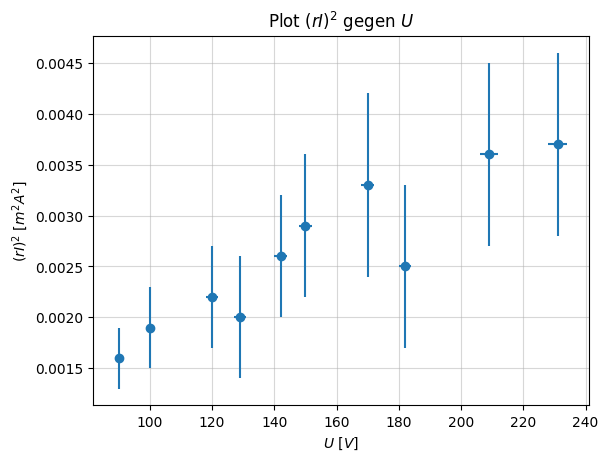

In [39]:
from util import graph_fit;
from util import graph;
import matplotlib.pyplot as plt;
from matplotlib.ticker import ScalarFormatter

plot = plt.subplots();
fig, ax = plot;

ax.set_xlabel(r"$U~[V]$");
ax.set_ylabel(r"$(rI)^2~[m^2 A^2]$");
ax.grid(alpha=.5) 
ax.set_title(r"Plot $(rI)^2$ gegen $U$")

graphfit = graph_fit.Linear.on_data(data, "U [V]", "(rI)^2");

scatter, errorbar, _ = graph.scatter_data(data, "U [V]", "(rI)^2", plot=plot) 
[cap.set_markersize(5) for cap in errorbar[1]]
plot_res = graph.plot_func(graphfit.func, plot=plot, label=r"$\chi^2$-Fit", change_viewport=False)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3))
ax.legend(loc="upper left")

fig.savefig("./output/242b")
fig.savefig("./pdf/plot_242b.pdf")

In [ ]:
print(params)
m_graph = params["m"]
print(f"Steigung = {m_graph}")


m: ( 15.3 ± 4.5)e-6 [·], n: (  2.9 ± 5.8)e-4 [·]
Steigung = ( 15.3 ± 4.5)e-6 [·]


### 242b.4

Bestimmen Sie mit Hilfe des Diagramms 𝑒/𝑚. Geben Sie 𝑒/𝑚 in C/kg an. 

Es gilt:

$$
\frac{e}{m} = \frac{2 R^2}{{0.716}^2 \mu_0^2 n^2} \frac{1}{m_{graph}}
$$

In [ ]:
def calc_em(m_graph):
    return 2 * R**2 / (0.716**2 * mu_0**2 * n**2 * m_graph);

In [ ]:
spezifische_Ladung = calc_em(m_graph)
print(f"e/m = {spezifische_Ladung}")

e/m = ( 21.5 ± 6.3)e+10 [·]


### 242b.5

Berechnen Sie die Größe von 𝐵E in Tesla.

Es gilt:

$$
B_E = \frac{1}{2} \left| B_{S,1} - B_{S,2} \right|
$$

In [ ]:
for d in data:
    d["B_S1 [T]"] = calc_B(d["I_1 [A]"])
    d["B_S2 [T]"] = calc_B(d["I_2 [A]"])

data.round_index("B_S1 [T]")
data.round_index("B_S2 [T]")

data = data.copy_remove_index("(rI)^2")
data = data.copy_remove_index("B [T]")
data = data.copy_remove_index("I [A]")
data = data.copy_remove_index("U [V]")
data = data.copy_remove_index("d [cm]")
data = data.copy_remove_index("d [m]")
data = data.copy_remove_index("r [m]")

data.print_2()

B_S1 [T]             | B_S2 [T]             | I_1 [A]              | I_2 [A]             
---------------------+----------------------+----------------------+---------------------
(538.0 ± 6.0)e-6 [·] | (491.0 ± 6.0)e-6 [·] | (690.0 ± 7.0)e-3 [·] | (630.0 ± 7.0)e-3 [·]
(577.0 ± 7.0)e-6 [·] | (546.0 ± 6.0)e-6 [·] | (740.0 ± 8.0)e-3 [·] | (700.0 ± 7.0)e-3 [·]
( 84.0 ± 2.0)e-5 [·] | (780.0 ± 8.0)e-6 [·] | (108.0 ± 2.0)e-2 [·] | (100.0 ± 1.0)e-2 [·]
( 90.0 ± 2.0)e-5 [·] | ( 84.0 ± 2.0)e-5 [·] | (116.0 ± 2.0)e-2 [·] | (108.0 ± 2.0)e-2 [·]
( 91.0 ± 2.0)e-5 [·] | ( 85.0 ± 2.0)e-5 [·] | (117.0 ± 2.0)e-2 [·] | (109.0 ± 2.0)e-2 [·]
( 97.0 ± 2.0)e-5 [·] | ( 90.0 ± 2.0)e-5 [·] | (124.0 ± 2.0)e-2 [·] | (115.0 ± 2.0)e-2 [·]
(116.0 ± 2.0)e-5 [·] | (109.0 ± 2.0)e-5 [·] | (149.0 ± 2.0)e-2 [·] | (140.0 ± 2.0)e-2 [·]
(116.0 ± 2.0)e-5 [·] | (108.0 ± 2.0)e-5 [·] | (149.0 ± 2.0)e-2 [·] | (139.0 ± 2.0)e-2 [·]
(108.0 ± 2.0)e-5 [·] | (102.0 ± 2.0)e-5 [·] | (138.0 ± 2.0)e-2 [·] | (131.0 ± 2.0)e-2 [·]
(108.0 ± 2

In [ ]:
for d in data:
    d["B_E [T]"] = 0.5 * abs(d["B_S1 [T]"] - d["B_S2 [T]"])

data.round_index("B_E [T]");
data.print_2()
data.save_to_excel_measurements("./output/242b_BE")

B_E [T]              | B_S1 [T]             | B_S2 [T]             | I_1 [A]              | I_2 [A]             
---------------------+----------------------+----------------------+----------------------+---------------------
( 23.0 ± 5.0)e-6 [·] | (538.0 ± 6.0)e-6 [·] | (491.0 ± 6.0)e-6 [·] | (690.0 ± 7.0)e-3 [·] | (630.0 ± 7.0)e-3 [·]
( 15.0 ± 5.0)e-6 [·] | (577.0 ± 7.0)e-6 [·] | (546.0 ± 6.0)e-6 [·] | (740.0 ± 8.0)e-3 [·] | (700.0 ± 7.0)e-3 [·]
(  3.0 ± 2.0)e-5 [·] | ( 84.0 ± 2.0)e-5 [·] | (780.0 ± 8.0)e-6 [·] | (108.0 ± 2.0)e-2 [·] | (100.0 ± 1.0)e-2 [·]
(  3.0 ± 2.0)e-5 [·] | ( 90.0 ± 2.0)e-5 [·] | ( 84.0 ± 2.0)e-5 [·] | (116.0 ± 2.0)e-2 [·] | (108.0 ± 2.0)e-2 [·]
(  3.0 ± 2.0)e-5 [·] | ( 91.0 ± 2.0)e-5 [·] | ( 85.0 ± 2.0)e-5 [·] | (117.0 ± 2.0)e-2 [·] | (109.0 ± 2.0)e-2 [·]
(  4.0 ± 2.0)e-5 [·] | ( 97.0 ± 2.0)e-5 [·] | ( 90.0 ± 2.0)e-5 [·] | (124.0 ± 2.0)e-2 [·] | (115.0 ± 2.0)e-2 [·]
(  3.0 ± 2.0)e-5 [·] | (116.0 ± 2.0)e-5 [·] | (109.0 ± 2.0)e-5 [·] | (149.0 ± 2.0)e-2 [·] | (140

In [ ]:
from util import mymath;

B_earth_measurements = data.column("B_E [T]");
B_earth_mean = mymath.error_weighted_mean(B_earth_measurements);
print(B_earth_mean);

( 21.4 ± 3.2)e-6 [·]
